In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

In [2]:
train, test = pd.read_csv("train.csv"), pd.read_csv("test.csv")
print(f"Shapes: train {train.shape}, test {test.shape}")
train.head(20)

Shapes: train (73276, 11), test (31405, 10)


,feature1,age,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,target
0,0.001963,42,0,0.079941,1350,7,0,0,0,0,0
1,0.004538,86,0,3.000000,,2,0,0,0,,0
2,0.023044,61,0,0.419916,5000,18,0,2,0,1,0
3,0.121242,48,0,0.526589,2500,12,0,1,0,1,0
4,1.000000,49,3,0.256567,5900,3,3,1,1,2,1
5,0.113789,68,1,0.005097,7650,2,0,0,0,1,0
6,0.254764,39,0,0.360161,11666,7,0,1,0,1,0
7,0.872515,47,0,2817.000000,,8,0,1,0,2,0
8,0.338555,71,0,0.397285,14364,12,0,2,0,0,0
9,1.000000,64,0,511.000000,,4,0,1,0,0,0


#### Due to unfilled info feature4 and feature9 has object data type, because in fact they are numerical

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73276 entries, 0 to 73275
Data columns (total 11 columns):
feature1    73276 non-null float64
age         73276 non-null int64
feature2    73276 non-null int64
feature3    73276 non-null float64
feature4    73276 non-null object
feature5    73276 non-null int64
feature6    73276 non-null int64
feature7    73276 non-null int64
feature8    73276 non-null int64
feature9    73276 non-null object
target      73276 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 6.1+ MB


#### Perhaps marking imputed objects, because absence of value can aslo be informative

In [4]:
# impute feature4 column with mean value
train['feature4'].replace(" ", np.NaN, inplace=True)
test['feature4'].replace(" ", np.NaN, inplace=True)

train['feature4'] = train['feature4'].astype(np.float64)
test['feature4'] = test['feature4'].astype(np.float64)

train['feature4'].replace(np.NaN, train['feature4'].mean(), inplace=True)
test['feature4'].replace(np.NaN, train['feature4'].mean(), inplace=True)


# impute feature9 column with most frequent value
train['feature9'].replace(" ", np.NaN, inplace=True)
test['feature9'].replace(" ", np.NaN, inplace=True)

values_dist = train['feature9'].value_counts(dropna=False)
print(values_dist)
value_to_fill = values_dist.index[0] # most frequent value
# maybe would be better to impute it as another category
# value_to_fill = 5

train['feature9'].replace(np.NaN, value_to_fill, inplace=True)
test['feature9'].replace(np.NaN, value_to_fill, inplace=True)

train['feature9'] = train['feature9'].astype('int')
test['feature9'] = test['feature9'].astype('int')

0      42390
1      13003
2       9537
3       4606
NaN     1900
4       1840
Name: feature9, dtype: int64


In [5]:
train.describe()

,feature1,age,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,target
count,73276.000000,73276.000000,73276.000000,73276.000000,73276.000000,73276.000000,73276.000000,73276.000000,73276.000000,73276.000000,73276.000000
mean,0.319472,52.465910,0.246384,332.632474,6404.130071,8.459891,0.087109,0.992808,0.062381,0.726773,0.066789
std,0.349851,14.423889,0.664956,1070.591318,3844.971412,4.866809,0.405338,0.985498,0.288855,1.066475,0.249657
min,0.000000,29.000000,0.000000,0.004329,1300.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029748,41.000000,0.000000,0.174224,3960.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.153913,52.000000,0.000000,0.364076,6404.130071,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.559585,63.000000,0.000000,0.857081,7416.000000,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,1.000000,87.000000,4.000000,43960.500000,25000.000000,24.000000,3.000000,4.000000,2.000000,4.000000,1.000000


Target variable is unbalanced. Only 6,7% of positive values. Because of this, we will use AUC metric also specifically in case of splitting reliable and unreliable borrowers will be useful to see recall value. With it, we can estimate how much of truly unreliable borrowers we found. 

In [6]:
train['target'].value_counts(normalize=True)

0    0.933211
1    0.066789
Name: target, dtype: float64

In [7]:
categorical_cols = ['feature2', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9']
numerical_cols = list(train.columns.difference(categorical_cols + ['target']))

#### Numerical features exploration

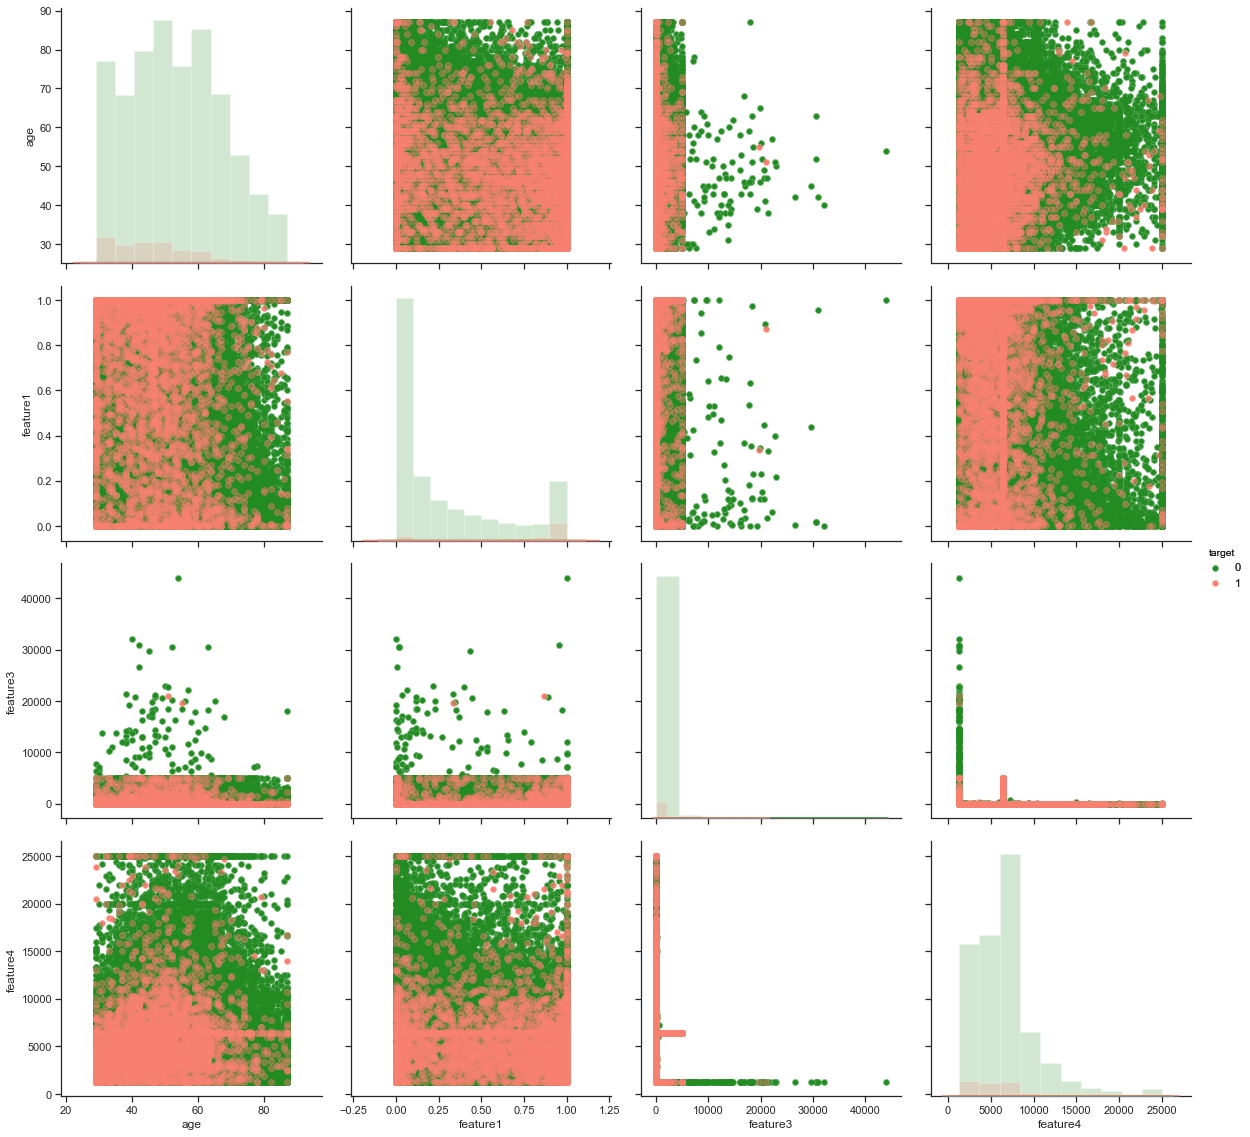

In [8]:
g = sns.pairplot(train, vars=numerical_cols, hue='target', height=4, palette=['forestgreen', 'salmon'])
g.map_diag(plt.hist, alpha=0.2)
g.map_offdiag(plt.scatter, alpha=0.4)
g.add_legend();

#### Here we can see that feature1 splits well out classes. We would expect high correlation with this feature. Also so much outliers in feature3 column

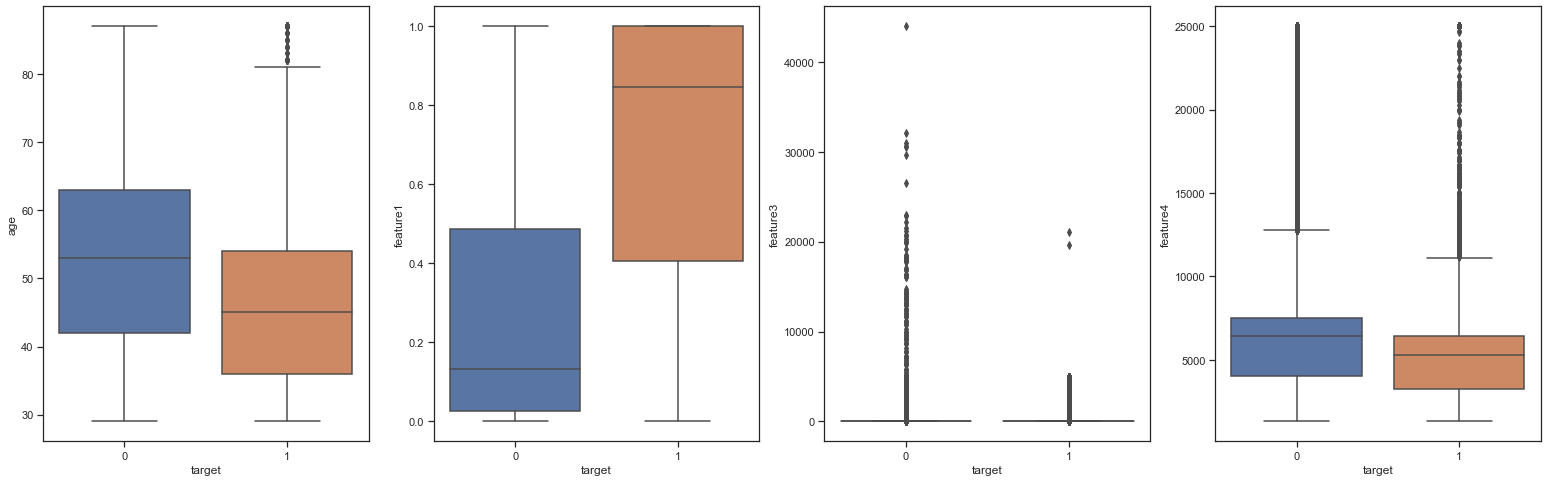

In [9]:
fig = plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols):
    ax = plt.subplot(int(f"1{len(numerical_cols)}{(i + 1)}"))
    sns.boxplot(x=train['target'], y=train[col], ax=ax)
plt.subplots_adjust(right=1, left=-0.3)

#### Our assumptions are confirmed (the lightest color). Another good news that we don't have high correlated features

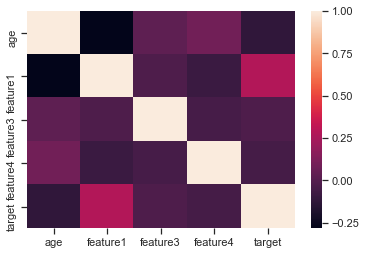

In [10]:
sns.heatmap(train[numerical_cols + ['target']].corr())

#### Categorical features exploration

#### Distributions of categorical features
Some features are strongly imbalanced. Feature5 has insteresting distribution and starts from not from 0 category, maybe it has an order.

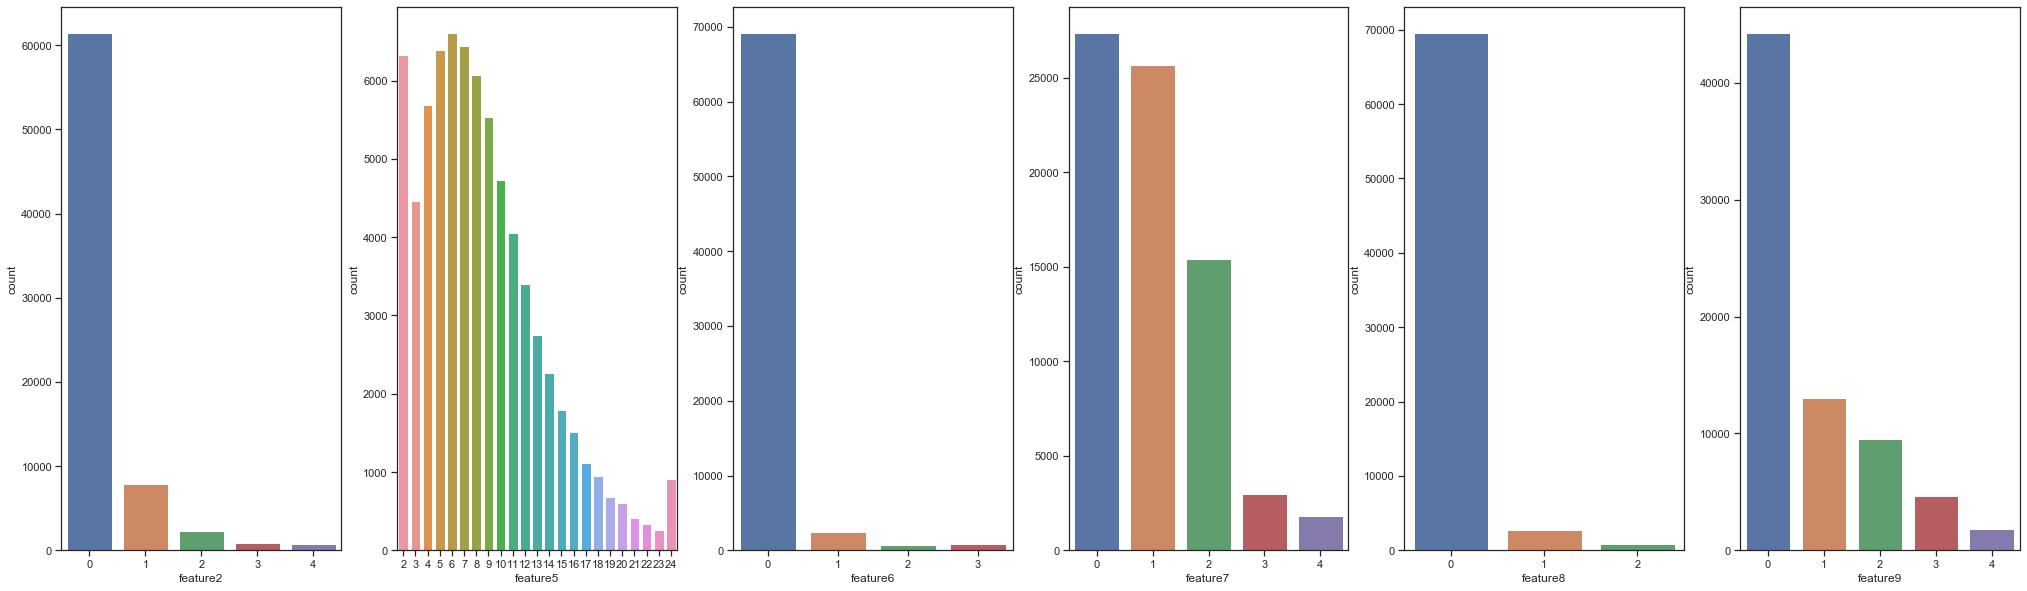

In [11]:
fig = plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols):
    ax = plt.subplot(int(f"1{len(categorical_cols)}{(i + 1)}"))
    sns.countplot(x=train[col], ax=ax)
plt.subplots_adjust(right=1, left=-0.7)

In [12]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder().fit(train[['feature5']])
train['feature5'] = encoder.transform(train[['feature5']])
test['feature5'] = encoder.transform(test[['feature5']])

#### Categorical features correlation with target. Kernel with an explanation https://www.kaggle.com/shakedzy/alone-in-the-woods-using-theil-s-u-for-survival

In [13]:
from collections import Counter
import math
import scipy.stats as ss

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

#### Nothing special was found

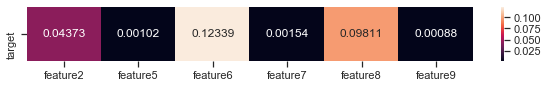

In [14]:
theils_us = pd.DataFrame(index=['target'], columns=categorical_cols)
for col in categorical_cols:
    u = theils_u(train[col].values, train['target'].values)
    theils_us.loc[theils_us.index[0], col] = u

theils_us.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(10,1))
sns.heatmap(theils_us, annot=True, fmt='.5f')

Feature encoding and scaling before LogisticRegression

In [26]:
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

def one_hot_encode(train, test, cols):
    train_df, test_df = train.copy(), test.copy()
  
    train_df = pd.get_dummies(train_df, columns=cols)
    test_df = pd.get_dummies(test_df, columns=cols)    
    return train_df, test_df

def standardize(train, test, num_cols, robust=True):
    train_df, test_df = train.copy(), test.copy()
    
    x = RobustScaler() if robust else StandardScaler()
    x.fit(train_df[num_cols].values)
    
    train_df[num_cols] = x.transform(train_df[num_cols].values)
    test_df[num_cols] = x.transform(test_df[num_cols].values)
    return train_df, test_df

Even after standartizing feature3 columns has so many outliers with RobustScaler so i would like to use StandardScaler

In [27]:
encoded_train, encoded_test = one_hot_encode(train, test, categorical_cols)

standardized_train, standardized_test = standardize(encoded_train, encoded_test, numerical_cols, robust=True)
print(f"With RobustScaler:\n{standardized_train[numerical_cols].describe()}\n")

standardized_train, standardized_test = standardize(encoded_train, encoded_test, numerical_cols, robust=False)
print(f"With StandardScaler:\n{standardized_train[numerical_cols].describe()}")

With RobustScaler:
                age      feature1      feature3      feature4
count  73276.000000  7.327600e+04  7.327600e+04  7.327600e+04
mean       0.021178  3.124717e-01  4.865856e+02  1.006528e-16
std        0.655631  6.602998e-01  1.567812e+03  1.112550e+00
min       -1.045455 -2.904914e-01 -5.268261e-01 -1.476889e+00
25%       -0.500000 -2.343460e-01 -2.780260e-01 -7.072136e-01
50%        0.000000  2.619280e-17 -4.064657e-17  0.000000e+00
75%        0.500000  7.656540e-01  7.219740e-01  2.927864e-01
max        1.590909  1.596882e+00  6.437678e+04  5.380749e+00

With StandardScaler:
                age      feature1      feature3      feature4
count  7.327600e+04  7.327600e+04  7.327600e+04  7.327600e+04
mean   2.474623e-16  9.483471e-17 -1.473914e-17 -1.594154e-16
std    1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00
min   -1.626889e+00 -9.131719e-01 -3.106978e-01 -1.327491e+00
25%   -7.949304e-01 -8.281411e-01 -3.105392e-01 -6.356736e-01
50%   -3.230147e-02 -4.732302

# Model selection

In [99]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, recall_score, roc_curve, roc_auc_score

pred_path = 'predictions'
path = 'models/'
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

In [53]:
def plot_roc(y_test, probas, model_name='Set a name'):
    no_skill_prediction = [0 for _ in range(len(y_test))]

    score = roc_auc_score(y_test, probas)
    fpr, tpr, _ = roc_curve(y_test, probas)
    no_skill_fpr, no_skill_tpr, _ = roc_curve(y_test, no_skill_prediction)

    plt.plot(fpr, tpr, label='RandomForest')
    plt.plot(no_skill_fpr, no_skill_tpr, label='NoSkillPrediction', linestyle='--')
    plt.text(0.5, 0.3, f"score = {score:.4f}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title(model_name);

#### RandomForest

In [ ]:
X, y = train.drop('target', axis=1).values, train['target'].values
X_final_test = test.values

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight="balanced", random_state=10)
res = cross_val_score(model, X, y, cv=skf, n_jobs=-1, scoring='roc_auc', verbose=2)
print(f'Mean roc_auc: {np.mean(res)}, std: {np.std(res)}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Mean roc_auc: 0.8376736170648952, std: 0.004744768119605859


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.1s finished


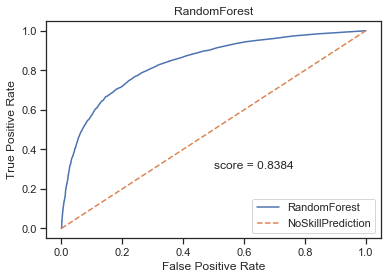

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

model = RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight="balanced", random_state=10)
model.fit(X_train, y_train)
probas = model.predict_proba(X_test)
probas = probas[:, 1]
plot_roc(y_test, probas, model_name='RandomForest')

This value tells us that very small amount of unreliable borrowers where found, thus we should minimize FalseNegative error

In [21]:
print(f"Recall: {recall_score(y_test, np.round(probas))}")

Recall: 0.16212534059945505


Lets search some better params with simple grid search. We choose a small number of variants for less time running through all of them

In [22]:
%%time
from sklearn.model_selection import GridSearchCV

params_grid = {
    'max_depth': [10, 100, None],
    'max_features': ['auto'],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 600, 1000],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    RandomForestClassifier(), params_grid,
    scoring=['roc_auc', 'recall'], n_jobs=-1,
    cv=skf, refit='recall', verbose=4)


grid_search.fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 53.3min finished


CPU times: user 34.5 s, sys: 253 ms, total: 34.7 s
Wall time: 53min 53s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_...
                                              random_state=None, verbose=0,
                                              warm_start=False),
   

Last cell took so much time, so i don't recomment to restart it

In [26]:
import os
from sklearn.externals import joblib

best_RandomForest = grid_search.best_estimator_
if not os.path.exists(path):
    os.mkdir(path)
joblib.dump(best_RandomForest, os.path.join(path, 'best_RF.pkl'))

print(f"Best recall score: {grid_search.best_score_}, best params: {grid_search.best_params_}")

Best recall score: 0.688192325126219, best params: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 600}


#### LogisticRegression

In [107]:
X, y = standardized_train.drop('target', axis=1).values, standardized_train['target'].values
X_final_test = standardized_test.values

In [33]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv = LogisticRegressionCV(class_weight='balanced', cv=skf, n_jobs=-1, scoring='roc_auc', verbose=2, random_state=10)
lr_cv.fit(X, y)
print(f"Scores:{lr_cv.scores_}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.5s finished


Scores:{1: array([[0.83051697, 0.84716041, 0.85468151, 0.85532514, 0.85520243,
        0.85518085, 0.85518331, 0.85518361, 0.85518302, 0.85518279],
       [0.83669735, 0.85291717, 0.86108973, 0.86287762, 0.86296255,
        0.86295687, 0.86295649, 0.86295687, 0.86295963, 0.86295761],
       [0.84030396, 0.8577324 , 0.86627842, 0.86818778, 0.86844419,
        0.86846637, 0.86846712, 0.8684719 , 0.86847249, 0.86847182],
       [0.84152853, 0.85553456, 0.85983883, 0.85953208, 0.85927619,
        0.85923205, 0.85922197, 0.85922197, 0.85922197, 0.85922174],
       [0.8231196 , 0.84108528, 0.849806  , 0.85123354, 0.85130763,
        0.85130561, 0.85130307, 0.85130322, 0.851303  , 0.85130278]])}


In [41]:
scores = lr_cv.scores_[1]
print(f"Means: {np.mean(scores, axis=1)}\nStds: {np.std(scores, axis=1)}")

Means: [0.85188    0.85913319 0.86432964 0.85718299 0.84730697]
Stds: [0.00750966 0.00804764 0.00861441 0.00534378 0.0086097 ]


In [50]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import joblib

grid = {
    "C": np.logspace(-3,3,7),
    "penalty": ["l1", "l2"] # l1 lasso l2 ridge or both
}

logreg = LogisticRegression(class_weight='balanced', verbose=3, n_jobs=-1, random_state=10)
logreg_cv = GridSearchCV(logreg, grid, cv=skf, scoring=['roc_auc', 'recall'], refit='recall')
logreg_cv.fit(X, y)

best_LogisticRegression = logreg_cv.best_estimator_
if not os.path.exists(path):
    os.makedir(path)
joblib.dump(best_LogisticRegression, os.path.join(path, 'best_LR.pkl'))

print(f"Tuned hyperparameters: {logreg_cv.best_params_}")
print(f"Recall: {logreg_cv.best_score_}")

/Users/oleshche/Projects/test_iwis/.env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent w

Tuned hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Recall: 0.7464266989185994
CPU times: user 8.11 s, sys: 2.41 s, total: 10.5 s
Wall time: 1min 49s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.8s finished


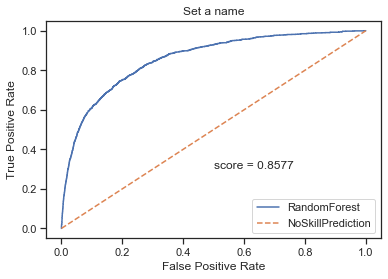

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

model = LogisticRegression(**logreg_cv.best_params_)
model.fit(X_train, y_train)
probas = model.predict_proba(X_test)
probas = probas[:, 1]
plot_roc(y_test, probas)

In [110]:
import joblib

model = joblib.load(os.path.join(path, 'best_LR.pkl'))

prediction = model.predict(X_final_test)
prediction_train = model.predict(X)

prediction = pd.Series(prediction, index=standardized_test.index, name='prediction')
prediction_train = pd.Series(prediction_train, index=standardized_train.index, name='prediction_train')
print(f"Shapes: test {prediction.shape}, train {prediction_train.shape}")

if not os.path.exists(pred_path):
    os.mkdir(pred_path)
    
prediction.to_csv(os.path.join(pred_path, 'lr_prediction.csv'))
prediction_train.to_csv(os.path.join(pred_path, 'lr_prediction_train.csv'))

Shapes: test (31405,), train (73276,)


/Users/oleshche/Projects/test_iwis/.env/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  from ipykernel import kernelapp as app
/Users/oleshche/Projects/test_iwis/.env/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  app.launch_new_instance()


#### MLP

In [105]:
X, y = standardized_train.drop('target', axis=1).values, standardized_train['target'].values
X_final_test = standardized_test.values

In [65]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y),
                                                 y)
print(class_weights)

[0.53578427 7.48630977]


In [81]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Input 
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

In [90]:
tf.random.set_seed(7)

h1 = 128
h2 = 64
dropout = 0.2
learning_rate = 1e-4
batch_size = 256
epochs = 30

input_layer = Input(shape=(X.shape[1],))
x = Dense(h1, activation='relu')(input_layer)
x = Dropout(dropout)(x)
x = Dense(h2, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)
                    
model = Model(inputs=[input_layer], outputs=[output_layer])
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['Recall', 'AUC', 'binary_crossentropy'])

tb = TensorBoard(f'net_logs/layers[{h1}]_{dropout}_[{h2}]_{batch_size}_{epochs}/')
checkpoint = ModelCheckpoint(os.path.join(path, 'best_mlp.h5'), save_best_only=True, monitor='loss')

model.fit(
    X, y, batch_size=batch_size, epochs=epochs,
    class_weight=class_weights, verbose=1,
    validation_split=0.3, callbacks=[tb, checkpoint],
    shuffle=True)

Train on 51293 samples, validate on 21983 samples
Epoch 1/30
51293/51293 [==============================] - 1s 29us/sample - loss: 0.3675 - Recall: 0.0421 - AUC: 0.5807 - binary_crossentropy: 0.3675 - val_loss: 0.2284 - val_Recall: 0.0000e+00 - val_AUC: 0.7974 - val_binary_crossentropy: 0.2284
Epoch 2/30
51293/51293 [==============================] - 1s 13us/sample - loss: 0.2105 - Recall: 2.9248e-04 - AUC: 0.7993 - binary_crossentropy: 0.2105 - val_loss: 0.1928 - val_Recall: 6.7797e-04 - val_AUC: 0.8463 - val_binary_crossentropy: 0.1928
Epoch 3/30
51293/51293 [==============================] - 1s 14us/sample - loss: 0.1929 - Recall: 0.0369 - AUC: 0.8300 - binary_crossentropy: 0.1929 - val_loss: 0.1839 - val_Recall: 0.0847 - val_AUC: 0.8527 - val_binary_crossentropy: 0.1839
Epoch 4/30
51293/51293 [==============================] - 1s 15us/sample - loss: 0.1882 - Recall: 0.1050 - AUC: 0.8389 - binary_crossentropy: 0.1882 - val_loss: 0.1813 - val_Recall: 0.1180 - val_AUC: 0.8565 - val_bi

/Users/oleshche/Projects/test_iwis/.env/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/Users/oleshche/Projects/test_iwis/.env/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


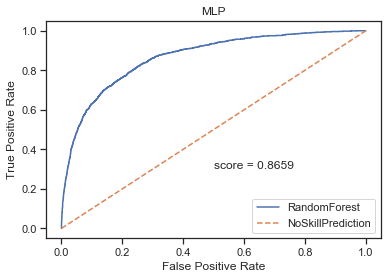

In [106]:
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)
model = load_model(os.path.join(path, 'best_mlp.h5'))
probas = model.predict(X_test)
plot_roc(y_test, probas, model_name='MLP')

# final pridictions
prediction = model.predict(X_final_test)
prediction_train = model.predict(X)

prediction = pd.Series(prediction[:, 0], index=standardized_test.index, name='prediction').round()
prediction_train = pd.Series(prediction_train[:, 0], index=standardized_train.index, name='prediction_train').round()

if not os.path.exists(pred_path):
    os.mkdir(pred_path)
prediction.to_csv(os.path.join(pred_path, 'mlp_prediction.csv'))
prediction_train.to_csv(os.path.join(pred_path, 'mlp_prediction_train.csv'))

## Summary

If we are looking at auc metric than our choice will lay on MLP model, but in my opinion is better to look at recall value because it says to us whether our model finds all unreliable borrowers, because it's not fearfully to predict reliable borrewer as '1' then opposite.